In [1]:
# Run this block to install gudhi
# !pip install gudhi

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import gudhi

In [3]:
df = pd.read_csv('NN13MAP1S1.csv')
print(df.shape)

(1021, 1022)


In [4]:
df.head()

,DataLine,Pos = 0,Pos = 1,Pos = 2,Pos = 3,Pos = 4,Pos = 5,Pos = 6,Pos = 7,Pos = 8,...,Pos = 1011,Pos = 1012,Pos = 1013,Pos = 1014,Pos = 1015,Pos = 1016,Pos = 1017,Pos = 1018,Pos = 1019,Pos = 1020
0,0.000,27.648523,26.285180,25.081029,26.209665,27.446471,26.881133,26.726022,31.856928,36.508215,...,45.412807,45.969982,45.963859,45.914877,46.023046,46.174075,46.586344,47.002694,47.216992,47.623138
1,0.625,29.409849,28.093447,26.893378,27.742406,28.785323,29.330253,29.626188,28.977171,28.268967,...,45.916917,45.874058,45.420971,45.082176,46.163870,47.141477,45.974064,44.857673,45.992432,47.394553
2,1.250,25.568812,29.620065,33.454979,32.191641,30.791561,34.150937,37.240910,32.773307,27.913845,...,45.337292,44.806650,45.192386,45.851608,47.400676,48.980358,50.364111,51.247835,48.739528,46.406741
3,1.875,25.995367,31.797741,37.171518,34.461159,31.232402,31.820191,32.875354,34.579533,35.934713,...,45.661801,45.223000,45.127076,45.339333,47.857845,50.302883,49.841632,48.961990,47.068004,45.339333
4,2.500,33.736628,35.285696,36.291876,31.222198,26.389268,30.313982,34.546878,31.797741,28.711850,...,48.296646,49.059955,48.149698,47.133314,46.343473,45.747520,46.767987,47.739471,47.310875,46.804723


In [5]:
df = df.drop('DataLine', axis=1)
df.head()

,Pos = 0,Pos = 1,Pos = 2,Pos = 3,Pos = 4,Pos = 5,Pos = 6,Pos = 7,Pos = 8,Pos = 9,...,Pos = 1011,Pos = 1012,Pos = 1013,Pos = 1014,Pos = 1015,Pos = 1016,Pos = 1017,Pos = 1018,Pos = 1019,Pos = 1020
0,27.648523,26.285180,25.081029,26.209665,27.446471,26.881133,26.726022,31.856928,36.508215,31.495683,...,45.412807,45.969982,45.963859,45.914877,46.023046,46.174075,46.586344,47.002694,47.216992,47.623138
1,29.409849,28.093447,26.893378,27.742406,28.785323,29.330253,29.626188,28.977171,28.268967,28.342441,...,45.916917,45.874058,45.420971,45.082176,46.163870,47.141477,45.974064,44.857673,45.992432,47.394553
2,25.568812,29.620065,33.454979,32.191641,30.791561,34.150937,37.240910,32.773307,27.913845,28.144470,...,45.337292,44.806650,45.192386,45.851608,47.400676,48.980358,50.364111,51.247835,48.739528,46.406741
3,25.995367,31.797741,37.171518,34.461159,31.232402,31.820191,32.875354,34.579533,35.934713,33.516207,...,45.661801,45.223000,45.127076,45.339333,47.857845,50.302883,49.841632,48.961990,47.068004,45.339333
4,33.736628,35.285696,36.291876,31.222198,26.389268,30.313982,34.546878,31.797741,28.711850,30.691555,...,48.296646,49.059955,48.149698,47.133314,46.343473,45.747520,46.767987,47.739471,47.310875,46.804723


In [6]:
# Creating the distance matrix numpy array
X = df.to_numpy()
X

array([[27.64852346, 26.28518001, 25.08102936, ..., 47.00269397,
        47.21699196, 47.62313769],
       [29.4098489 , 28.09344692, 26.89337813, ..., 44.85767307,
        45.99243198, 47.39455316],
       [25.56881242, 29.62006503, 33.4549787 , ..., 51.24783524,
        48.73952821, 46.40674144],
       ...,
       [75.66964314, 74.50835209, 73.52666317, ..., 29.88538636,
        30.46297048, 31.6038522 ],
       [73.83688504, 73.16133611, 72.71845359, ..., 44.8719596 ,
        45.30259653, 46.10672425],
       [75.67984781, 75.77373074, 75.9921106 , ..., 47.0659629 ,
        47.2190329 , 47.45782209]])

In [7]:
X.shape

(1021, 1021)

In [8]:
# Removing the latex dependency
gudhi.persistence_graphical_tools._gudhi_matplotlib_use_tex=False

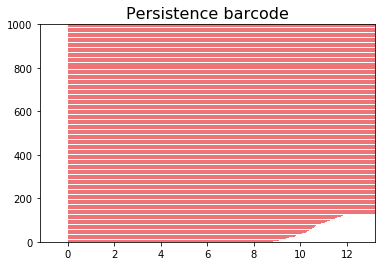

In [9]:
# Using default parameters. Change it as required 
# The barcode diagram is being generated from the distance matrix, X
rips_complex = gudhi.RipsComplex(distance_matrix=X, max_edge_length=12.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
diag = simplex_tree.persistence(min_persistence=0.4)

gudhi.plot_persistence_barcode(diag)
plt.show()

### Resources

1. https://gudhi.inria.fr/python/latest/index.html
2. https://gudhi.inria.fr/python/latest/persistence_graphical_tools_user.html